Overview

# Data manipulation

Python's native types include strings, numbers, lists, dictionaries (unordered set of key to value mappings), but not standard statistical data type such as vectors, matrices, or data frames. Lists are treated differently than vectors (e.g., adding two lists concatenates them rather than doing element-wise addition).

In [4]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

## Numpy arrays

The foundation of numeric data types in Python are `numpy` arrays. These are n-dimensional arrays of a consistent numeric type. They behave like one would expect

In [5]:
import numpy as np

a = np.array([1, 2, 3])   # Create a rank 1 array
print("a:", a)
print(a.shape)            # Prints "(3,)"
print(a + a) #element-wise addition
print(a*a) #element-wise multication
print(type(a))            # Prints "<class 'numpy.ndarray'>"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array; [first row, second row]
print(b) #rows displayed descending
print(b.shape)                     # Prints "(2, 3)"
print(b*b) #element-wise multiplication!
print(b@b.T) #matrix mulitiplication! (using transpose operator)
print(b>2)
print(np.logical_and(b>2, b<5)) # normal | and & are bitwise rather than logical so use these
print(np.logical_or(b<2, b>5))

a: [1 2 3]
(3,)
[2 4 6]
[1 4 9]
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]
(2, 3)
[[ 1  4  9]
 [16 25 36]]
[[14 32]
 [32 77]]
[[False False  True]
 [ True  True  True]]
[[False False  True]
 [ True False False]]
[[ True False False]
 [False False  True]]


Python uses 0-based indexing so the first element is indexed by 0 (where in R it's 1-based). A list of integers can be used to index a vector (for higher-order arrays, see `np.ix_()`)

In [6]:
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"
print(a[[0,2]]) #

print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

1 2 3
[5 2 3]
[5 3]
1 2 4


One can also use a logical array of the right length to filter elements

In [7]:
c = np.array([[1,2,3],[4,5,6],[7,8,9]])
c[np.array([True, True, False]),]

array([[1, 2, 3],
       [4, 5, 6]])

To select a contiguous range, use the 'slice' notation `start`:`stop`, which selects items `start` and up through, but not include `stop`.

In [8]:
a2 = np.array([0,1,2,3,4])
print(a2[1:4])   # items indexed 1 through 3
print(a2[1:])
print(a2[:4]) 

[1 2 3]
[1 2 3 4]
[0 1 2 3]


One thing to note is that slicing (as opposed to the other methods, creates views which can modify the original)

In [9]:
print(a)
e_int = a[[1,2]]
print(e_int)
e_int[1] = 10
print(a)
e_bool = a[np.array([False, True, True])]
print(e_bool)
e_bool[1] = 11
print(a)
e_slice = a[1:3]
e_slice[1] = 12
print(a)

[5 2 3]
[2 3]
[5 2 3]
[2 3]
[5 2 3]
[ 5  2 12]


In terms of knowing when things can be modified by methods, we need to know that objects can be `mutable` (e.g., array) or immutable (e.g., integer) and that Python uses a system called "pass by assignment" or "pass by object reference" (variable names are references "bound" to an actual object/value). If you pass a mutable object into a method, the method gets a reference to that same object and you can mutate it to your heart's delight, but if you rebind the reference in the method, the outer scope will know nothing about it, and after you're done, the outer reference will still point at the original object. Immutable objects can't be changed.

In [11]:
def mod_args(scalar, arr):
    scalar = 10 
    arr[0] = 10 #changes outer scope
    arr = np.array([11,12,13]) #doesn't change outer-scope

sc = 1
a = np.array([1,2,3])
print([sc, a])
mod_args(sc, a)
print([sc, a])

[1, array([1, 2, 3])]
[1, array([10,  2,  3])]


Numpy has most the basic matrix function (e.g., random number generator).

See [here](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) for a detailed comparison with Matlab

## Figuring things out

In [ ]:
help(np.zeros)

Ex: How would you add a constant to every element in an array? Define a new array and try something out!

In [ ]:
# Try here!

## Pandas DataFrames

Pandas allows putting indexes on data

In [12]:
import pandas as pd
s = pd.Series([1,2,3], index=["USA", "Canada", "Mexico"]) #if you don't supply one, it'll be 0-based integer sequence
print(s)

USA       1
Canada    2
Mexico    3
dtype: int64


DataFrames allow for (a) "indexes" across the columns (e.g., column names) and rows (e.g., years), and (b) heterogeneous data in one structure. DataFrames are built on top of numpy arrays.

In [13]:
df = pd.DataFrame({'a':[0,1,2], 'b':["a","b","c"], 'c':[0., 1., 2.]}, index=[10,11,12]) #build from dictionary of column names -> list of values
print(df)
print(df.columns)
print(df.index)
print(df.dtypes)

    a  b    c
10  0  a  0.0
11  1  b  1.0
12  2  c  2.0
Index(['a', 'b', 'c'], dtype='object')
Int64Index([10, 11, 12], dtype='int64')
a      int64
b     object
c    float64
dtype: object


[val] can be used to select columsn, and [:] can be used to select rows. Given there are now index labels as well as integer positions, there are additional indexers `.loc` for label-based (or boolean array) and `.iloc` for integer-based (or boolean).

In [14]:
print(df["a"]) # returns a pd.Series
print(df[0:1])
print(df.iloc[1:3, 1:3])
print(df.loc[[10,11], ["b", "c"]])

10    0
11    1
12    2
Name: a, dtype: int64
    a  b    c
10  0  a  0.0
    b    c
11  b  1.0
12  c  2.0
    b    c
10  a  0.0
11  b  1.0


Advanced concepts:
- Indexes (either row or column) can be multi-level, so for example, rows could be indexed by (time, county name)
- Pandas includes some data types not included in numpy: explicit string (why numpy uses the generic fallback 'object'), categoricals, and nullable

Comparison to other suites:
- [R](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html)
- [Stata](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html)

Here are some ways to figure things out
1. `help`
2. Most packages have web pages with good hyperlinked help
3. Just try things out!

# Learning from Data

In [59]:
#Mean outcome function
def degree4_ybar(x1):
    beta_true = np.array([[.2],[-.01], [.3],[-.005]]) # coefficient vector
    alpha_true = 1
    #featurize
    x2 = np.power(x1, 2) # squared    
    x3 = np.power(x1, 3) # cubed     
    x4 = np.power(x1,4) # 4th power 
    X = np.stack([x1,x2,x3,x4], axis=1) # X is the concatenation of 4 column vectors
    ybar = alpha_true +  np.squeeze(X@beta_true) #squeeze makes (N,1) -> (N,) #
    return(ybar)

#Generate random data
def degree4_dgp(N):
    x1 = np.random.uniform(-2,2, size=N)
    ybar = degree4_ybar(x1)
    err = np.random.normal(size=N)*1.5
    y = ybar + err 
    # y is generated from a 4th order polynomial with N(0,2.25) errors   
    data = pd.DataFrame({'y':y, 'x':x1})           
    return(data) #return observed variables

N = 1500
data = degree4_dgp(N)
data.head()

,y,x
0,-0.161169,0.030802
1,1.096031,-0.381127
2,1.618527,1.229293
3,-1.643339,-1.542087
4,-1.204494,-1.378398


In [61]:
def fit_poly(data, p):
    import statsmodels.formula.api as smf
    #vander creates the polynomial expansion of x (including constant in p+1)
    return(smf.ols(formula='y ~ np.vander(x, p+1, increasing=True) -1', data=data).fit())

#We'll do the constant model also
num_p = 8+1
ps = np.arange(num_p)
pop_size = 10000
def true_oos_mse(fit_model, dgp, N_new=pop_size):
    #For a known DGP we could analytically determine the true oos MSE, but this is simple and more general
    data_val = dgp(N_new)
    y_hat = fit_model.predict(data_val)
    return(np.power(y_hat-data_val["y"], 2).mean())

is_mses = np.empty(num_p)
oos_mses = np.empty(num_p)
for p in ps:
    fit = fit_poly(data, p)
    y_hat = fit.predict(data)
    is_mses[p] = np.power(y_hat - data["y"], 2).mean()
    oos_mses[p] = true_oos_mse(fit, degree4_dgp)

In [84]:
def bias_var_decomp(data, models, ybar_fn):
    S = len(models)
    N = data.shape[0]
    
    yhat = np.empty((N,S))
    for s in range(S):
        yhat[:,s] = models[s].predict(data)
    
    yhat_bar = yhat.mean(axis=1)
    ybar = ybar_fn(data["x"])
    #calc statistics along x
    m_bias2 = np.power(yhat_bar - ybar, 2)
    m_var = np.power(yhat - np.expand_dims(yhat_bar, 1), 2).mean(axis=1) #Mat - colvec does it for each column
    m_mse = np.power(yhat - np.expand_dims(data["y"], 1), 2).mean(axis=1)
    # return averages over x
    return((m_bias2.mean(), m_var.mean(), m_mse.mean()))


In [86]:
n_sim=10 #1000
d_val = degree4_dgp(pop_size)
is_mse_sim = np.empty((n_sim, num_p))
m_bias = np.empty(num_p)
m_var = np.empty(num_p)
m_oos_mse = np.empty(num_p)
data_sim = [degree4_dgp(N) for s in range(n_sim)]
for p in range(num_p):
    fits = []
    for s in range(n_sim):
        d = data_sim[s]
        fits.append(fit_poly(d, p))
        is_mse_sim[s,p] = np.power(fits[s].predict(d) - d["y"], 2).mean()
    m_bias[p], m_var[p], m_oos_mse[p] = bias_var_decomp(d_val, fits, degree4_ybar)

is_mse_sim_mean = is_mse_sim.mean(axis=0)

       bias       var        is       oos
0  1.269590  0.001929  3.511080  3.511923
1  0.134055  0.001804  2.342615  2.387252
2  0.132930  0.003854  2.338709  2.389015
3  0.000610  0.004191  2.191281  2.241989
4  0.000624  0.004589  2.190889  2.242361
5  0.001358  0.005235  2.189623  2.243411
6  0.001224  0.007118  2.187635  2.245178
7  0.001250  0.007877  2.186873  2.246090
8  0.001313  0.009050  2.185646  2.247613


<AxesSubplot:>

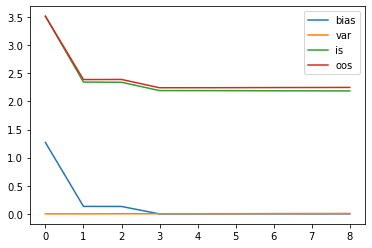

In [89]:
metrics = pd.DataFrame({'bias':m_bias, 'var':m_var, "is":is_mse_sim_mean, "oos":m_oos_mse}, index=ps)
print(metrics)
metrics.plot()

In [ ]:
data_split = function(data,split=.1):
    N = data.shape[0]
    
    # Randomly split by shuffling data
    data = np.random.shuffle(data)
    
    c = round(N*split)
    test = data[:c,:]
    train = data[c:,:]
    
    return([train,test])


train_test, validation  = data_split(data) 

In [ ]:
def CV_linear(train_test, n_folds, p=1):
    N = train_test.shape[0] # Number of observations                          
    
    size = round(N/n_folds) # The size of each 
    
    MSE = np.empty(n_folds) #MSE evaluated on the test data
    yhat = np.empty((N, n_folds))

    for i in range(n_folds):
        # This block just assigns train/test to each fold

        test_mask = np.mod(range(N), n_folds)==i
        
        # Once we have our train/test folds we want to estimate 
        # the model on the training set and predict on the test
        fit = fit_poly(train_test[!test_mask,], p)
        yhat[:,i] = fit.predict(train_test[test_mask,]) 
                                                                             
        MSE[i] = mean((train_test[test_mask,"y"]-yhat[,i])^2)            

    return([MSE, yhat])

num_folds = 5       
[MSE, yhat] = CV_linear(train_test, num_folds)                           

print('MSE evaluated on each test fold:', MSE)

In [ ]:
# Wrapping our previous code into a function
fit_models(train_test, n_folds, num_p):
    mse = np.empty((num_p,n_folds))
    for p in range(num_p):
        mse[p,:] = CV_linear(train_test, n_folds, p)[1]
    return(mse)

mse = fit_models(train_test,num_folds, max_p)